# Homework 2

First run the cell below, just to make sure all the modules you need are imported.

In [9]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If there are exercises that we didn't get to in class, insert some cells here and copy them over so you can finish them.

### In-Class Remnant, Exercise 3: Apply what we've learned on a new dataset.

In the ```fivethirtyeight``` folder, there is also a file ```librarians.csv``` that organizes data about library jobs per capita. Using snippets of code from the discussion above, load this dataset as a DataFrame, and use the boxplot method to visualize the ```jobs_1000``` column broken up by state (```prim_state```).

The boxplot will initially be congested, because fifty states are lot. You may need to add ```figsize=(12,6)``` as a keyword argument inside the ```boxplot()``` call in order to stretch the x axis a bit.

../data/fivethirtyeight/librarians.csv
<class 'pandas.core.frame.DataFrame'>
(371, 9)
['prim_state' 'area_name' 'tot_emp' 'emp_prse' 'jobs_1000' 'loc_quotient'
 'mor' 'high_emp' 'low_emp']


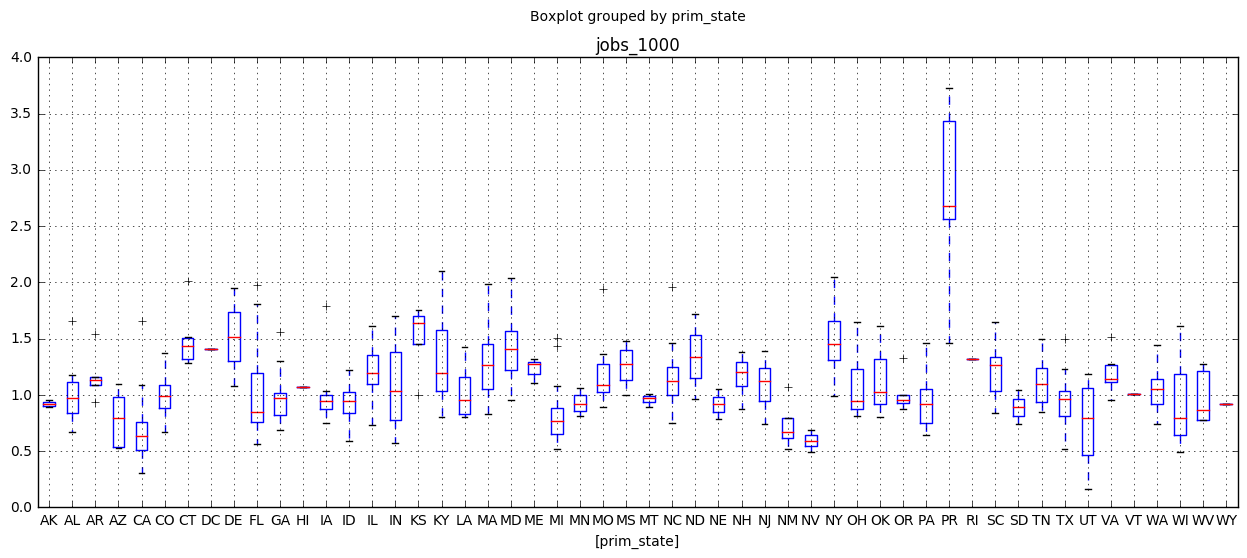

In [17]:
relativepath = os.path.join('..', 'data', 'fivethirtyeight', 'librarians.csv')
print(relativepath)

lib = pd.read_csv(relativepath)
print(type(lib))
print(lib.shape)

print(lib.columns.values)

lib.boxplot(column = ['jobs_1000'], by =['prim_state'], figsize = (15,6))
plt.show()

### Exercise 1.

Once that's done, do a little exploratory analysis of the fivethirtyeight dataset we didn't cover in class, bechdel.csv. This has data on films that did, or didn't, pass the Bechdel test for minimal representation of women. You may want to start by reading [the story by Walt Hickey on FiveThirtyEight.](https://fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/)

Then try a few things:

1. Check the correlation between raw ```budget``` and ```domgross``` (domestic gross receipts). Is it stronger or weaker than the correlation between those figures in inflation-adjusted 2013 dollars (```budget_2013``` and ```domgross_2013```)? Plot a scatterplot of the relationship between the two columns that have the strongest relationship. Make a guess about why it's stronger.

2. Plot a boxplot to assess the distribution of ```budget_2013``` broken out by the column ```binary```, which tells you in the simplest terms whether a film passed or failed the Bechdel test. How confident are you, just looking at the boxplot, that there's a significant difference between these two distributions?

This analysis will probably feel very tentative and incomplete; that's okay. It's setting us up for more work on the Bechdel dataset next week, when we'll be able to test some of these hypotheses more rigorously.

../data/fivethirtyeight/bechdel.csv
['year' 'imdb' 'title' 'test' 'clean_test' 'binary' 'budget' 'domgross'
 'intgross' 'code' 'budget_2013' 'domgross_2013' 'intgross_2013'
 'period_code' 'decade_code']


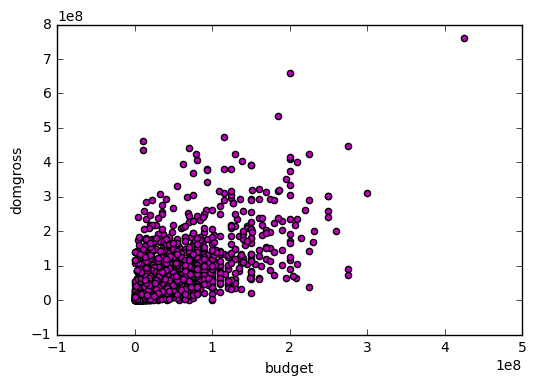

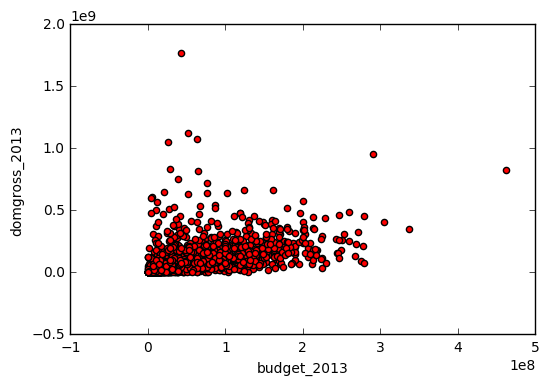

(nan, 1.0)
18000000
(nan, 1.0)
7165829


In [11]:
import os
relativepath = os.path.join('..', 'data', 'fivethirtyeight', 'bechdel.csv')
print(relativepath)

bmov = pd.read_csv(relativepath)

print(bmov.columns.values)

bmov.plot(kind = 'scatter', x = 'budget', y = 'domgross', color = 'm', marker = 'o')
plt.show()

bmov.plot(kind = 'scatter', x = 'budget_2013', y = 'domgross_2013', color = 'r', marker = 'o')
plt.show()

from scipy.stats.stats import pearsonr
rawcoef = pearsonr(bmov['budget'], bmov['domgross'])
print(rawcoef)
print(bmov['budget'][bmov['domgross'].idxmin()])

yrcoef = pearsonr(bmov['budget_2013'], bmov['domgross_2013'])
print(yrcoef)
print(bmov['budget_2013'][bmov['domgross_2013'].idxmin()])


It looks like the correlation is strongest using raw budget and raw domgross as comapred to the 2013 variants. I'm basing this on the fact that, in the raw numbers, the gross matches with the budget more often in a 1:1 ratio. But, I confess, interpreting this type of data is not my strongest suit, having no statistics or math background.

As mentioned, the correlation doesn't work due to quirks in the data, so it throws a "nan."

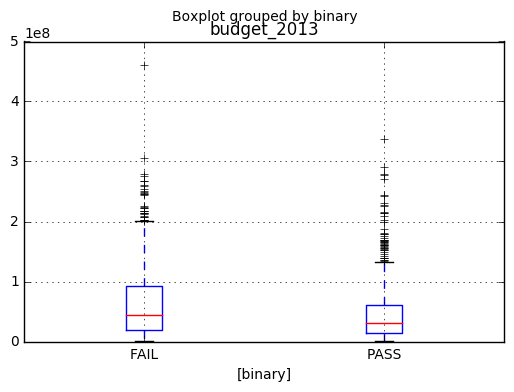

In [12]:
# Plot a boxplot to assess the distribution of budget_2013 broken out by the column binary, which tells you
#  in the simplest terms whether a film passed or failed the Bechdel test. How confident are you, just looking
#  at the boxplot, that there's a significant difference between these two distributions?

bmov.boxplot(column = ['budget_2013'], by =['binary'])
plt.show()

Looking at the boxplot, it seems that there is a correlation between films with lower budgets and films that pass the Bechdel test. There seems to be the heaviest concentrations of the films that pass in the 10-20 million budget range and the films that do not in the 20-30 million range. Given that our test data has about the same number of films that pass and that do not (from doing a cursory check of the raw csv), I'd say this is a relatively strong connection. In the end, I'd need to know more about the data to be able to justify the correlation, though, as I am not sure if the total of ~1900 films over ~30 years is close to encompassing all released films, if this includes foreign films, what types of genres are covered, etc. However, regardless of the data, this is a very useful exploratory analysis, in my opinion, as it draws out these other questions and hints at a meaningful conclusion. 